In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from scipy import stats
agw2017 = pd.read_stata("agw2017")
agw2013 = pd.read_stata("agw2013")
agw2007 = pd.read_stata("agw2007")

gez2017 = pd.read_stata("gez2017")
gez2013 = pd.read_stata("gez2013")
gez2007 = pd.read_stata("gez2007")




In [39]:
print(agw2013["b26ogb"])

0       225000.000000
1       220000.000000
2                 NaN
3            0.000000
4                 NaN
5       255000.000000
6       150000.000000
7                 NaN
8       175000.000000
9       200000.000000
10      260000.015625
11      200000.000000
12                NaN
13           0.000000
14           0.000000
15                NaN
16           0.000000
17      400000.000000
18                NaN
19      545000.000000
20           0.000000
21           0.000000
22      245000.000000
23           0.000000
24           0.000000
25      125000.000000
26      175000.000000
27      200000.000000
28      479999.968750
29      400000.000000
            ...      
2011              NaN
2012              NaN
2013         0.000000
2014         0.000000
2015    260000.015625
2016              NaN
2017              NaN
2018    255000.000000
2019              NaN
2020         0.000000
2021              NaN
2022         0.000000
2023    370000.000000
2024              NaN
2025      

Vragenlijst Wonen en Hypotheken
B26Og eigenaar van woning (1=ja, 0=nee)
B26Hy hypotheken op de woning
B26Vz cash value levensverzekering hypotheek woning
B27Og eigenaar van tweede woning (1=ja, 0=nee)
B27Hy hypotheken op tweede woning
B27Vz cash value levensverzekering hypotheek tweede woning

### Eerst maak ik de Net-worth variabele

Dit doe ik dmv een functie die alle bezittingen (b1b, b2b, ..., b30b) bij elkaar optelt en daar de schulden (s1b, s2b, ..., s8b, x1b) vanaf trekt.

In [22]:
def calcWealth(row):
    wealth = (row["b1b"] + row["b2b"] + row["b3b"] + row["b4b"] + row["b6b"] + row["b7b"] + row["b8b"] + row["b11b"]
              + row["b12b"] + row["b13b"] + row["b14b"] + row["b15b"] + row["b16b"] + row["b17b"] + row["b18b"] + 
             row["b19ogb"] + row["b19hyb"] + row["b19vzb"] + row["b20b"] + row["b21b"] + row["b22b"] + row["b23b"] +
             row["b24b"] + row["b25b"] + row["b28b"] + row["b29b"] + row["b30b"])
    # Door te checken of b26ogb > -1 zorg ik dat enkel rows zonder NaN hier worden gebruikt. Ze zijn of volledig Nan of niet
    if row["b26ogb"] > -1:
        wealth += row["b26ogb"] + row["b26vzb"] + row["b27ogb"] + row["b27vzb"]
    return wealth

In [23]:
def calcDebt(row):
    debt = (row["s1b"] + row["s2b"] + row["s3b"] + row["s4b"] + row["s5b"] + row["s6b"] + row["s7b"] + row["s8b"] +
           row["x1b"]) 
    # Door te checken of b26ogb > -1 zorg ik dat enkel rows zonder NaN hier worden gebruikt. Ze zijn of volledig Nan of niet
    if row["b26ogb"] > -1:
        debt += row["b26hyb"] + row["b27hyb"]
    
    return debt

In [24]:
def calcNetWorth(row):
    netWorth = row["wealth"] - row["debt"]
    return netWorth

In [32]:
agw2017["debt"] = agw2017.apply(calcDebt, axis = 1)
agw2013["debt"] = agw2013.apply(calcDebt, axis = 1)
agw2007["debt"] = agw2007.apply(calcDebt, axis = 1)




In [33]:
print(agw2013["debt"])

0       111000.000000
1       239500.000000
2            0.000000
3            0.000000
4            0.000000
5       115000.000000
6        22000.000000
7            0.000000
8        90450.000000
9        54000.000000
10      135000.000000
11           0.000000
12           0.000000
13           0.000000
14         100.000000
15           0.000000
16        2770.000000
17      148770.000000
18           0.000000
19      224000.000000
20           0.000000
21           0.000000
22      119999.992188
23           0.000000
24       10750.000326
25       83000.000000
26      204000.000000
27      119999.992188
28      225000.000000
29           0.000000
            ...      
2011         0.000000
2012         0.000000
2013     10000.000000
2014         0.000000
2015         0.000000
2016         0.000000
2017         0.000000
2018         0.000000
2019         0.000000
2020         0.000000
2021         0.000000
2022     20000.000000
2023         0.000000
2024         0.000000
2025     1

In [34]:
agw2017["wealth"] = agw2017.apply(calcWealth, axis = 1)
agw2013["wealth"] = agw2013.apply(calcWealth, axis = 1)
agw2007["wealth"] = agw2007.apply(calcWealth, axis = 1)



In [35]:
print(agw2013["wealth"])

0       4.127469e+05
1       2.374062e+05
2       8.000000e+02
3       5.031900e+04
4       0.000000e+00
5       3.584789e+05
6       1.620000e+05
7       4.096055e+04
8       2.882295e+05
9       2.428600e+05
10      5.690460e+05
11      2.143370e+05
12      7.340000e+03
13      6.313500e+03
14      1.500000e+03
15      1.464200e+04
16      7.681250e+02
17      4.160610e+05
18      4.042000e+03
19      5.745000e+05
20      3.852500e+04
21      9.158000e+03
22      2.491250e+05
23      1.300000e+03
24      4.700000e+03
25      1.636555e+05
26      2.274663e+05
27      2.463040e+05
28      5.004860e+05
29      4.315300e+05
            ...     
2011    0.000000e+00
2012    4.532750e+04
2013    2.271327e+05
2014    1.340000e+03
2015    2.662500e+05
2016    1.370543e+04
2017    1.500000e+02
2018    2.855000e+05
2019    2.040000e+04
2020    3.450000e+04
2021    0.000000e+00
2022    5.325000e+03
2023    4.015000e+05
2024    1.109337e+03
2025    7.072721e+03
2026    2.526000e+05
2027    9.073

In [27]:
agw2017["netWorth"] = agw2017.apply(calcNetWorth, axis = 1)
agw2013["netWorth"] = agw2013.apply(calcNetWorth, axis = 1)
agw2007["netWorth"] = agw2007.apply(calcNetWorth, axis = 1)

In [43]:
print(agw2013["netWorth"])

0       3.017469e+05
1      -2.093750e+03
2       8.000000e+02
3       5.031900e+04
4       0.000000e+00
5       2.434789e+05
6       1.400000e+05
7       4.096055e+04
8       1.977795e+05
9       1.888600e+05
10      4.340460e+05
11      2.143370e+05
12      7.340000e+03
13      6.313500e+03
14      1.400000e+03
15      1.464200e+04
16     -2.001875e+03
17      2.672910e+05
18      4.042000e+03
19      3.505000e+05
20      3.852500e+04
21      9.158000e+03
22      1.291250e+05
23      1.300000e+03
24     -6.050000e+03
25      8.065553e+04
26      2.346628e+04
27      1.263040e+05
28      2.754860e+05
29      4.315300e+05
            ...     
2011    0.000000e+00
2012    4.532750e+04
2013    2.171327e+05
2014    1.340000e+03
2015    2.662500e+05
2016    1.370543e+04
2017    1.500000e+02
2018    2.855000e+05
2019    2.040000e+04
2020    3.450000e+04
2021    0.000000e+00
2022   -1.467500e+04
2023    4.015000e+05
2024    1.109337e+03
2025   -2.927279e+03
2026    2.526000e+05
2027   -6.226

In [45]:
# Counter om aantal positieve en negatieve networths te tellen
pos = 0
neg = 0
zero = 0

# Arrays om de negatieven en positieven networths bij te houden
negatives = []
positives = []

# Bepaald voor iedere row of de networth positief of negatief is en zet deze waarde in een array
for x in range(0, agw2013.shape[0] - 1):
    if agw2013.loc[x,"netWorth"] > 0:
        positives.append(agw2013.loc[x, "netWorth"])
        pos += 1
    elif agw2013.loc[x, "netWorth"] < 0:
        negatives.append(agw2013.loc[x, "netWorth"])
        neg += 1
    else:
        zero += 1
        
print("aantal positieve networth: " + str(pos) +  " aantal negatieve networth: " + str(neg))
print("aantal met net worth nul (waarschijnlijk lege entries): " + str(zero))

aantal positieve networth: 1722 aantal negatieve networth: 219
aantal met net worth nul (waarschijnlijk lege entries): 99


In [ ]:


negatives.sort()
positives.sort()

plt.hist(positives)
plt.title("positive net worths")
plt.show()

plt.hist(positives, range = (0, 250000))
plt.title("positive net worths met max wealth 250k")
plt.show()

plt.hist(negatives)
plt.title("negative net worths")
plt.show()

plt.hist(negatives, range = (-25000, 0))
plt.title("negative net worths with -25k max debt")
plt.show()





# Hier boven:

het feit dat bezit tot 10x zo veel gaat als schuld, kan leiden tot ene verschil in effect op  gezondheid (bijvoorbeeld 10x minder sterk oid) Misschien hier nog iets mee doen!

In [ ]:
merged2017 = pd.merge(gez2017, agw2017, on = "personid")
merged2013 = pd.merge(gez2013, agw2013, on = "personid")
merged2007 = pd.merge(gez2007, agw2007, on = "personid")


In [ ]:
merged = pd.merge(merged2017, merged2013, on = "personid")
merged = pd.merge(merged, merged2007, on = "personid")


In [29]:
print(merged.shape)

(537, 427)


In [30]:
def selfAssedHealth(row):
    healthValues = {"Excellent" : 1, "Good" : 1, "Fair" : 1, "Not so good" : 0, "Poor" : 0,
                    "excellent" : 1, "good" : 1, "fair" : 1, "not so good" : 0, "poor" : 0} 
    
    return healthValues[row["gez3"]]


http://www.statsmodels.org/stable/discretemod.html

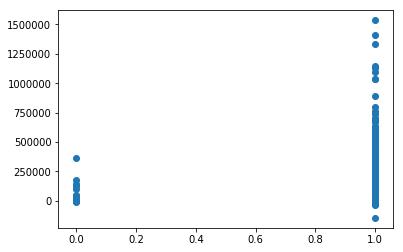

In [31]:
merged["selfAssedHealth"] = merged.apply(selfAssedHealth, axis = 1)
plt.scatter(merged.selfAssedHealth, merged.netWorth)
merged2017["selfAssessedHealth"] = merged2017.apply(selfAssedHealth, axis = 1)
merged2013["selfAssessedHealth"] = merged2013.apply(selfAssedHealth, axis = 1)
merged2007["selfAssessedHealth"] = merged2007.apply(selfAssedHealth, axis = 1)







In [65]:
def nHealthy(data):
    healthy = 0
    unhealthy = 0
    for x in range(0, data.shape[0] - 1):
        if data.loc[x, "selfAssessedHealth"] == 1:
            healthy += 1
        else:
            unhealthy += 1
    print("aantal healthy: " + str(healthy) + " en aantal unhealthy: " + str(unhealthy))

In [66]:
nHealthy(merged2013)

aantal healthy: 1574 en aantal unhealthy: 74


In [67]:
nHealthy(merged2007)

aantal healthy: 1731 en aantal unhealthy: 77


In [69]:
nHealthy(merged2017)

aantal healthy: 2091 en aantal unhealthy: 123


In [72]:
frames = [merged2007, merged2013, merged2017]
langeLijst = pd.concat(frames)

In [73]:
langeLijst.to_stata("langeLijst.dta")

In [18]:
merged2017.to_stata("merged_data2017.dta")
merged2013.to_stata("merged_data2013.dta")
merged2007.to_stata("merged_data2007.dta")

In [ ]:
merged.to_stata("merged_data.dta")

In [ ]:
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)


In [20]:
print(merged)

      index_x  nohhold_x  nomem_x    weeknr   gez1   gez2         gez3  \
0           0        6.0      1.0  201718.0  176.0   97.0         Good   
1           1       21.0      1.0  201717.0  175.0   92.0         Good   
2           2       38.0      1.0  201717.0  157.0   76.0         Good   
3           3      106.0      1.0  201717.0  182.0   99.0         Good   
4           4      173.0      1.0  201717.0  193.0   97.0    Excellent   
5           5      175.0      1.0  201718.0  176.0   82.0         Fair   
6           6      262.0      2.0  201717.0  182.0   84.0         Good   
7           7      268.0      1.0  201717.0  168.0   80.0    Excellent   
8           8      338.0      2.0  201717.0  172.0   84.0         Good   
9           9      339.0      2.0  201717.0  167.0   75.0         Fair   
10         10      371.0      1.0  201717.0  176.0   82.0         Good   
11         11      423.0      1.0  201717.0  175.0   68.0         Good   
12         12      461.0      1.0  201